In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
# import matplotlib
# matplotlib.use('qtagg')
import matplotlib.pyplot as plt
# plt.ion()
from pytrans.analysis.mode_solver import HarmonicTrap
from pytrans.ions import Ca40
from pytrans.plotting import plotting as pp

from pytrans.analysis import analyse_potential
from pytrans.plotting import plotting as pp

from models.surface_trap import SurfaceTrap

[14.47320749  5.60216381  3.65431206]
[-0.97697125  0.         -0.21337097]
[0. 1. 0.]
[ 0.21337097  0.         -0.97697125]


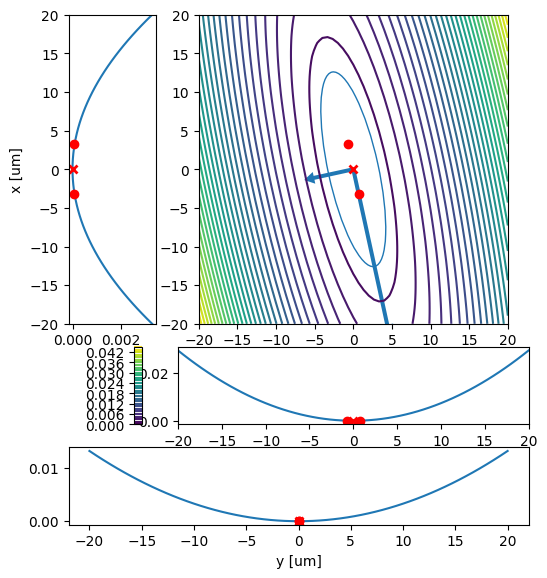

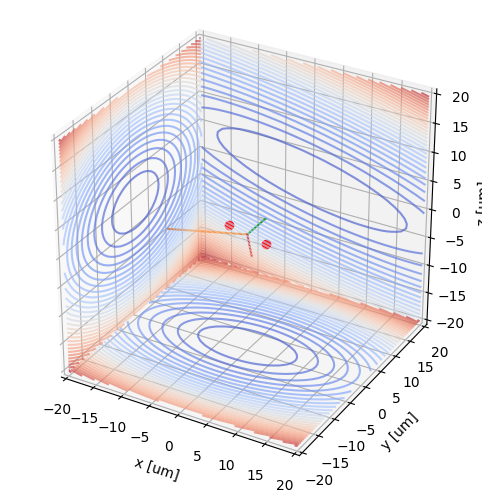

In [40]:
htrap = HarmonicTrap(fx=1e6, fy=2e6, fz=3e6, ion=Ca40, stray_field=[0, 0, 0])
# htrap._H_dc[1, 2] = htrap._H_dc[2, 1] = -3e7
htrap._H_dc[0, 2] = htrap._H_dc[2, 0] = 3e7

r0 = (0, 0, 0)
roi = (20e-6, 20e-6, 20e-6)
res = analyse_potential(htrap, None, ions=[Ca40]*2, r0=r0, verbose=False, roi=roi, trap_axis='y')
# res

fig, ax = pp.plot3d_contours(htrap, voltages=None, ion=Ca40, r0=r0, roi=roi, pseudo=True)
pp.plot_ion_positions(ax, res)
pp._plot3d_mode_vectors(ax, res)





In [8]:
ax.get_w_lims()

(-20.0, 20.0, -20.0, 20.0, -20.0, 20.0)

In [28]:
np.asarray(ax.get_w_lims()).reshape(3, 2).ptp(axis=1)


array([40., 40., 40.])

In [30]:
isinstance(ax, plt.Axes)

True

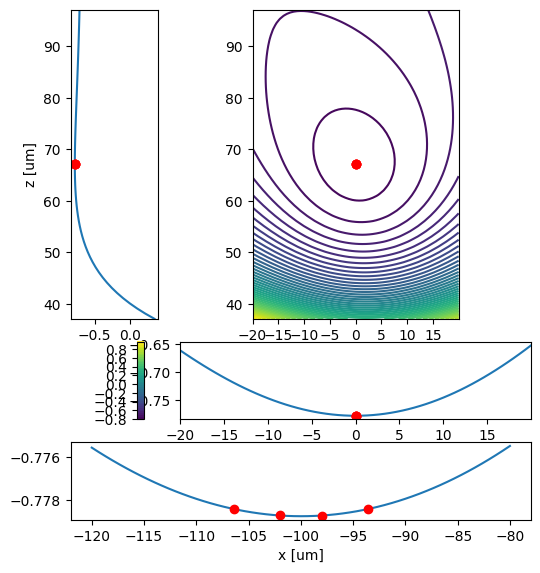

In [17]:
trap = SurfaceTrap()
voltages = np.load('transport\waveform.npy')[0]
r0 = np.asarray([trap.x_ele(2), 0, trap.z0]) + np.random.randn(3) * 1e-8

res = analyse_potential(trap, voltages, ions=[Ca40] * 4, r0=r0, verbose=False, roi=(20e-6, 20e-6, 30e-6))
# res


In [18]:
from pytrans.plotting.plotting import plot3d_contours

(<Figure size 800x600 with 1 Axes>,
 <Axes3D: xlabel='x [um]', ylabel='y [um]', zlabel='z [um]'>)

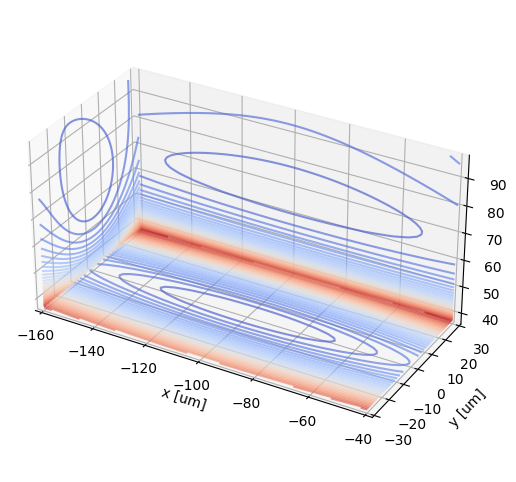

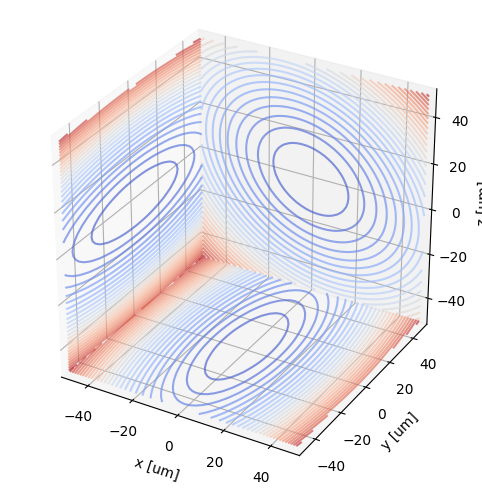

In [19]:
r0 = (trap.x_ele(2), 0, trap.z0)
roi = (60e-6, 30e-6, 30e-6)
plot3d_contours(trap, voltages, ion=Ca40, r0=r0, roi=roi, pseudo=True)

r0 = (0, 0, 0)
roi = (50e-6, 50e-6, 50e-6)
plot3d_contours(htrap, voltages=None, ion=Ca40, r0=r0, roi=roi, pseudo=True)

